In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sep
import pandas as pd

In [31]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [32]:
logging.basicConfig(format="%(message)s", level=logging.INFO)

LOG = logging.getLogger(__name__)

In [5]:
# with open("../debblend_results0.pkl", 'rb') as f:
#     blends = pickle.load(f)

In [ ]:
data_path = get_data_dir_path()
file_names = listdir_fullpath(os.path.join(data_path, "")
for in range(

In [6]:
import hickle as hkl
blends=hkl.load("../debblend_results0.hkl")

In [7]:
blends.keys()

dict_keys(['blend_images', 'isolated_images', 'blend_list', 'psf', 'wcs', 'scarlet_predictions', 'madness_predictions'])

In [8]:
blends["blend_list"][0]

IDENT_1,ra,dec,ref_mag,BAND,WEIGHT,GAL_FILENAME,PSF_FILENAME,GAL_HDU,PSF_HDU,PIXEL_SCALE,NOISE_MEAN,NOISE_VARIANCE,NOISE_FILENAME,stamp_flux,IDENT_2,mag_auto,flux_radius,zphot,sersicfit,bulgefit,fit_status,fit_mad_s,fit_mad_b,fit_dvc_btt,use_bulgefit,viable_sersic,hlr,flux,btk_size,btk_index,x_peak,y_peak,not_drawn_u,not_drawn_g,not_drawn_r,not_drawn_i,not_drawn_z,not_drawn_y
int32,float64,float64,float64,bytes5,float64,bytes32,bytes36,int32,int32,float64,float64,float64,bytes26,float64,int32,float64,float64,float64,float64[8],float64[16],int32[5],float64,float64,float64,int32,int32,float64[3],float64[4],float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
114656,-6.096148662624163,0.8294495288524502,24.70199966430664,F814W,0.6725800037384033,real_galaxy_images_25.2_n76.fits,real_galaxy_PSF_images_25.2_n76.fits,876,876,0.029999999329447746,-5.195139965508133e-05,7.092030045896536e-06,acs_I_unrot_sci_20_cf.fits,3.378310085448902,114656,24.701932907104492,4.0240960121154785,4.184000015258789,0.05582879926581247 .. 0.7416622479436635,0.002805854688621419 .. 0.7734060231603443,1 .. 1,0.0023845385486783383,0.002530654272385994,0.8283721232425767,0,1,0.04947354509421889 .. 0.0,3.5658033527706183 .. 0.0,0.1207228776650977,70480,81.51925667804548,116.14724764584464,0.0,0.0,0.0,0.0,0.0,0.0
546191,-14.485296291092224,-7.3508159873935615,24.965999603271484,F814W,0.6588799953460693,real_galaxy_images_25.2_n72.fits,real_galaxy_PSF_images_25.2_n72.fits,888,888,0.029999999329447746,3.3804801205405965e-05,8.221810276154429e-06,acs_I_unrot_sci_20_cf.fits,2.4911146558297332,546191,24.965761184692383,5.012394905090332,0.375900000333786,0.01422813354711827 .. 1.8304365778323326,0.009947950907802027 .. 1.5667242916287258,1 .. 1,0.0019036333782279018,0.0019960239457415523,0.1616823627094316,0,1,0.10823319600470133 .. 0.0,2.7355360417373484 .. 0.0,0.15037184379163726,66808,39.573518425390674,75.24591995673475,0.0,0.0,0.0,0.0,0.0,0.0
830828,15.587922860029998,7.107379005756908,24.533000946044922,F814W,0.6052199602127075,real_galaxy_images_25.2_n76.fits,real_galaxy_PSF_images_25.2_n76.fits,45,45,0.029999999329447746,0.00012868900375906378,6.47056003799662e-06,acs_I_unrot_sci_20_cf.fits,3.343589116433577,830828,24.53297996520996,10.380253791809082,2.3645999431610107,0.001950776168743295 .. 0.031188308792674167,0.0007130613206760377 .. 0.7573123903146688,1 .. 1,0.0025778495210041913,0.002408790101600683,0.45688365128969705,1,1,0.29314521440480873 .. 0.47178168223532124,3.7816709773411405 .. 3.962252108406341,0.3114076067937699,69706,189.9396144484324,147.53689514422229,0.0,0.0,0.0,0.0,0.0,0.0
632246,5.42882490887591,15.654032262747279,24.641000747680664,F814W,0.5982199907302856,real_galaxy_images_25.2_n7.fits,real_galaxy_PSF_images_25.2_n7.fits,141,141,0.029999999329447746,3.825510066235438e-05,7.813319825800136e-06,acs_I_unrot_sci_20_cf.fits,2.8359407443297187,632246,24.64053726196289,11.401450157165527,2.759399890899658,0.0006077633044928814 .. 0.11115721015850466,0.0014892571436538127 .. -0.4663145695868044,1 .. 1,0.002730207967208069,0.0021769433922514273,0.36568459802212483,1,1,0.537874261215061 .. 0.3446367454139908,5.108798079174023 .. 3.765058557558113,0.3420434970696977,5665,139.14412455067762,190.270161491142,0.0,0.0,0.0,0.0,0.0,0.0
76617,-1.5033793573049792,7.082230024089089,24.92099952697754,F814W,0.6439200043678284,real_galaxy_images_25.2_n72.fits,real_galaxy_PSF_images_25.2_n72.fits,123,123,0.029999999329447746,-1.3233099707576912e-05,5.860360033693723e-06,acs_I_unrot_sci_20_cf.fits,2.6242524574772688,76617,24.921310424804688,6.223389148712158,1.0195000171661377,0.012918482301879045 .. 1.1268943314513258,0.008657754715135062 .. 2.4793638316449056,1 .. 1,0.0024222142060211036,0.002368644692112394,3.76396054423187e-17,0,1,0.143084099040318 .. 0.0,2.508681318415904 .. 0.0,0.18670167028825713,66097,104.48310321333291,147.41115013528147,0.0,0.0,0.0,0.0,0.0,0.0
68448,7.910149872804006,9.176377001940068,23.035999298095703

In [9]:
blends["blend_list"][0].keys()

['IDENT_1',
 'ra',
 'dec',
 'ref_mag',
 'BAND',
 'WEIGHT',
 'GAL_FILENAME',
 'PSF_FILENAME',
 'GAL_HDU',
 'PSF_HDU',
 'PIXEL_SCALE',
 'NOISE_MEAN',
 'NOISE_VARIANCE',
 'NOISE_FILENAME',
 'stamp_flux',
 'IDENT_2',
 'mag_auto',
 'flux_radius',
 'zphot',
 'sersicfit',
 'bulgefit',
 'fit_status',
 'fit_mad_s',
 'fit_mad_b',
 'fit_dvc_btt',
 'use_bulgefit',
 'viable_sersic',
 'hlr',
 'flux',
 'btk_size',
 'btk_index',
 'x_peak',
 'y_peak',
 'not_drawn_u',
 'not_drawn_g',
 'not_drawn_r',
 'not_drawn_i',
 'not_drawn_z',
 'not_drawn_y']

In [10]:
from maddeb.metrics import compute_pixel_covariance_and_fluxes
madness_results = {}
scarlet_results = {}

for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    for metric in ["_covariance", "_actual_flux", "_predicted_flux"]:
        madness_results[band+metric] = []
        scarlet_results[band+metric] = []

madness_results["field_num"] = []
scarlet_results["field_num"] = []

madness_results = pd.DataFrame(madness_results)
scarlet_results = pd.DataFrame(scarlet_results)

In [11]:
for field_num in range(len(blends["blend_images"])):
    num_galaxies = len(blends["blend_list"][field_num])

    isolated_images = blends["isolated_images"][field_num][0:num_galaxies]
    
    madness_current_res = compute_pixel_covariance_and_fluxes(
        blends["madness_predictions"][field_num], isolated_images, blends["blend_images"][field_num]
    )
    scarlet_current_res = compute_pixel_covariance_and_fluxes(
        blends["scarlet_predictions"][field_num], isolated_images, blends["blend_images"][field_num]
    )

    size = blends['blend_list'][field_num]['btk_size']
    
    madness_current_res['size'] = size
    scarlet_current_res['size'] = size
    
    madness_current_res['field_num'] = [field_num]*num_galaxies
    scarlet_current_res['field_num'] = [field_num]*num_galaxies
    #make this a table
    
    madness_results = pd.concat([madness_results, madness_current_res], ignore_index=True)
    scarlet_results = pd.concat([scarlet_results, scarlet_current_res], ignore_index=True)

/pbs/throng/lsst/users/bbiswas/FlowDeblender/maddeb/metrics.py:106: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "convariance_and_flux_helper" failed type inference due to: No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 2d, C), array(bool, 2d, C))
 
There are 22 candidate implementations:
     - Of which 20 did not match due to:
     Overload of function 'getitem': File: <numerous>: Line N/A.
       With argument(s): '(array(float64, 2d, C), array(bool, 2d, C))':
      No match.
     - Of which 2 did not match due to:
     Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 166.
       With argument(s): '(array(float64, 2d, C), array(bool, 2d, C))':
      Rejected as the implementation raised a specific error:
        NumbaTypeError: unsupported array index type array(bool, 2d, C) in [array(bool, 2d, C)]
  raised from /pbs/t

In [12]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    madness_results[band+"_relative_flux_err"] = (madness_results[band+"_predicted_flux"]-madness_results[band+"_actual_flux"])/madness_results[band+"_actual_flux"]
    scarlet_results[band+"_relative_flux_err"] = (scarlet_results[band+"_predicted_flux"]-scarlet_results[band+"_actual_flux"])/scarlet_results[band+"_actual_flux"]

In [13]:
scarlet_results

,u_covariance,u_actual_flux,u_predicted_flux,g_covariance,g_actual_flux,g_predicted_flux,r_covariance,r_actual_flux,r_predicted_flux,i_covariance,...,z_blendedness,y_blendedness,galaxy_num,size,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
0,0.990383,8023.937816,10744.706632,0.989574,6.357594e+04,8.760838e+04,0.988359,1.261875e+05,1.717875e+05,0.987816,...,0.421815,0.406362,0.0,0.120723,0.339081,0.378012,0.361367,0.404311,0.320459,0.216612
1,0.997723,6288.863216,6887.100027,0.997435,4.983287e+04,5.614546e+04,0.996991,9.891153e+04,1.097056e+05,0.996787,...,0.234071,0.312225,1.0,0.150372,0.095126,0.126675,0.109128,0.112831,0.220388,0.372596
2,0.998207,9368.427343,8853.653671,0.998054,7.423491e+04,7.535587e+04,0.997835,1.473458e+05,1.494914e+05,0.997747,...,0.138291,0.164773,2.0,0.311408,-0.054948,0.015100,0.014562,-0.057222,-0.043008,0.031012
3,0.726932,8482.909611,1456.126061,0.712111,6.721165e+04,7.227315e+04,0.692086,1.334050e+05,2.147396e+05,0.684346,...,0.864417,0.871340,3.0,0.342043,-0.828346,0.075307,0.609682,0.520277,0.283343,0.537012
4,0.998975,6558.226897,7097.584808,0.998808,5.196237e+04,5.381403e+04,0.998545,1.031356e+05,1.095611e+05,0.998421,...,-0.105798,0.059396,4.0,0.186702,0.082241,0.035635,0.062301,0.055018,-0.088922,0.086813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.707212,6341.615177,7832.259522,0.690744,5.024599e+04,5.946479e+04,0.668604,9.973106e+04,1.049295e+05,0.660025,...,0.592895,0.585120,75.0,0.175178,0.235058,0.183473,0.052124,0.197653,0.108822,0.339199
208,0.994914,8548.723288,8959.916773,0.994666,6.773828e+04,8.263039e+04,0.994292,1.344503e+05,1.629139e+05,0.994123,...,0.255205,0.392614,76.0,0.378793,0.048100,0.219848,0.211703,0.204070,0.144770,0.522662
209,0.985841,5670.853021,5105.359468,0.985535,4.493039e+04,3.745753e+04,0.985072,8.917819e+04,6.748104e+04,0.984874,...,0.496556,0.515560,77.0,0.424578,-0.099719,-0.166321,-0.243301,-0.239424,-0.236407,-0.078251
210,0.996850,160678.839317,144098.064908,0.996752,1.273085e+06,1.026408e+06,0.996603,2.526850e+06,1.862567e+06,0.996543,...,0.130991,0.111234,78.0,0.446257,-0.103192,-0.193763,-0.262890,-0.247854,-0.200097,-0.154723


### Plot the correlations

(0.98, 1.0)

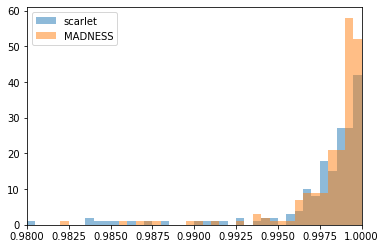

In [14]:
bins = np.arange(0.95, 1, 0.0005)
plt.hist(scarlet_results['r_covariance'], bins=bins, alpha=0.5, label="scarlet")
plt.hist(madness_results['r_covariance'], bins=bins, alpha=0.5, label="MADNESS")
plt.legend()
plt.xlim([0.98, 1])

### Plot the relative flux error

In [15]:
def gauss(x, sig, mu):
    return np.exp(-0.5 * (x - mu) ** 2 / sig**2) / (np.sqrt(2.0 * np.pi) * sig)

In [16]:
from scipy.optimize import curve_fit
from scipy.stats import norm

Madness mu: -0.05536173603544154
Madness sig: 0.05187255013226252
Scarlet mu: 0.01503776985784333
Scarlet sig: 0.09232238794893514


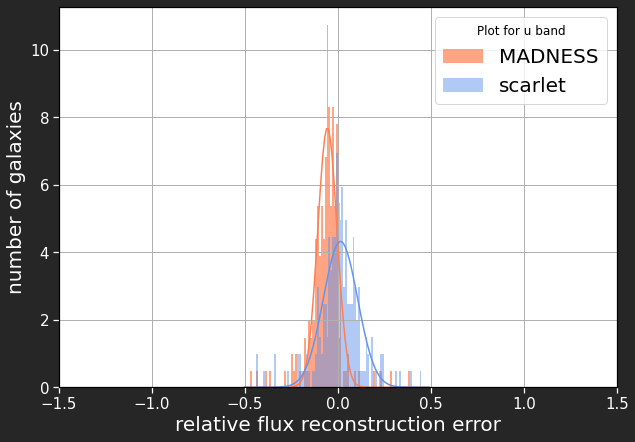

Madness mu: -0.003952669026955598
Madness sig: 0.04334064101936102
Scarlet mu: 0.0027112541205146744
Scarlet sig: 0.0767262136489736


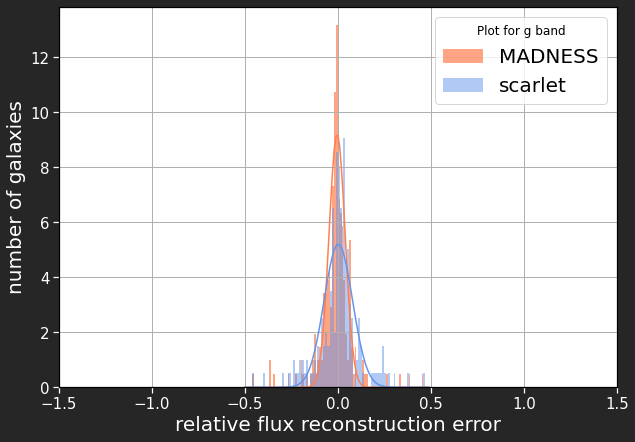

Madness mu: -0.001790391586889524
Madness sig: 0.044871924193840396
Scarlet mu: 0.006765586676588608
Scarlet sig: 0.08712610351779386


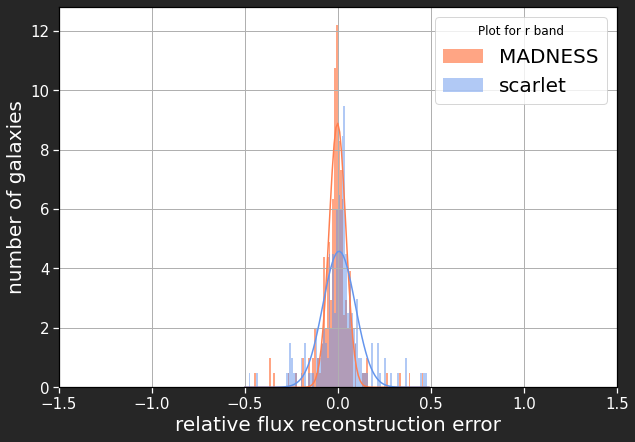

Madness mu: -0.007271553486642581
Madness sig: 0.0421786356544043
Scarlet mu: 0.017799803473356284
Scarlet sig: 0.09830973811735697


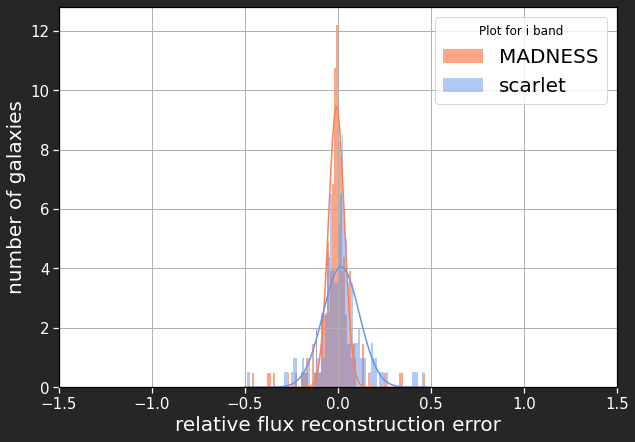

Madness mu: -0.01142847750750329
Madness sig: 0.04153169031924236
Scarlet mu: 0.01801985910497681
Scarlet sig: 0.10139661409516922


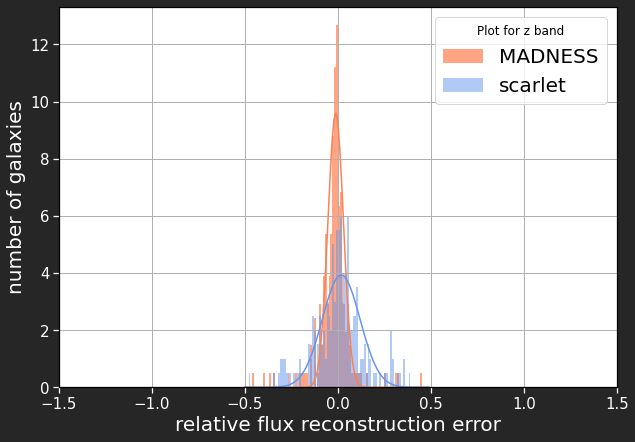

Madness mu: -0.01699455022316667
Madness sig: 0.04815214512971666
Scarlet mu: 0.00301835267811916
Scarlet sig: 0.14975298473725804


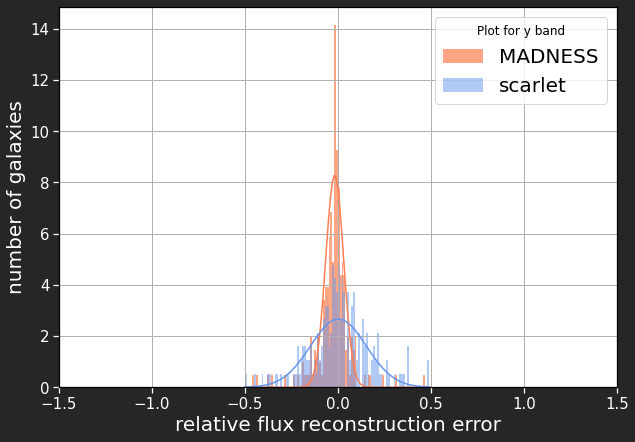

In [17]:
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):

    madness_actual_flux = madness_results[band+"_actual_flux"].values
    madness_predicted_flux = madness_results[band+"_predicted_flux"].values

    scarlet_actual_flux = scarlet_results[band+"_actual_flux"].values
    scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].values

    scarlet_relative_difference = np.divide(
        scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
    )
    madness_relative_difference = np.divide(
        madness_predicted_flux - madness_actual_flux, madness_actual_flux
    )
    
    n_bins = 100
    hist, bin_tmp = np.histogram(madness_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    madness_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins)])

    hist, bin_tmp = np.histogram(scarlet_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    scarlet_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins)])
    
    sns.set_theme(style={"axes.grid": True,
                     'axes.labelcolor': 'white',
                     'figure.facecolor': '.15',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'text.color': 'black',
                     'image.cmap': 'viridis',})
    plt.figure(figsize=(10, 7))
    bins = np.arange(-0.5, 0.5, 0.01)
    plt.hist(
        madness_relative_difference[
            np.logical_not(np.isnan(madness_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.7,
        color="coral",
        label="MADNESS",
    )
    plt.plot(bins, norm.pdf(bins, madness_fit[0][1], madness_fit[0][0]), color="coral")
    LOG.info("Madness mu: " + str(madness_fit[0][1]))
    LOG.info("Madness sig: " + str(madness_fit[0][0]))
    plt.hist(
        scarlet_relative_difference[
            np.logical_not(np.isnan(scarlet_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.5,
        color="cornflowerblue",
        label="scarlet",
    )
    plt.plot(
        bins, norm.pdf(bins, scarlet_fit[0][1], scarlet_fit[0][0]), color="cornflowerblue"
    )
    LOG.info("Scarlet mu: " + str(scarlet_fit[0][1]))
    LOG.info("Scarlet sig: " + str(scarlet_fit[0][0]))
    plt.legend(fontsize=20, title = "Plot for " + band + " band")
    ax = plt.gca()
    plt.xlabel("relative flux reconstruction error", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.ylabel("number of galaxies", fontsize=20)
    plt.xlim([-1.5, 1.5])
    plt.show()

# Compare apperture photometry

In [18]:
from maddeb.metrics import compute_apperture_photometry

actual_photometry = {}
madness_photometry = {}
scarlet_photometry = {}
blended_photometry = {}

for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    for column in ["field_num", "_flux", "_fluxerrs", "_flags"]:
        actual_photometry[band + column] = []
        madness_photometry[band + column] = []
        scarlet_photometry[band + column] = []
        blended_photometry[band + column] = []
        
actual_photometry["field_num"] = []
madness_photometry["field_num"] = []
scarlet_photometry["field_num"] = []
blended_photometry["field_num"] = []

actual_photometry = pd.DataFrame(actual_photometry)
madness_photometry = pd.DataFrame(madness_photometry)
scarlet_photometry = pd.DataFrame(scarlet_photometry)
blended_photometry = pd.DataFrame(blended_photometry)

In [19]:
for field_num in range(len(blends['blend_images'])):

    bkg_rms = {}
    for band in range(6):
        bkg_rms[band] = sep.Background(blends["blend_images"][field_num][band]).globalrms


    actual_results_current = compute_apperture_photometry(
        field_image = blends["blend_images"][field_num],
        predictions=blends["isolated_images"][field_num],
        xpos=blends["blend_list"][field_num]["x_peak"],
        ypos=blends["blend_list"][field_num]["y_peak"],
        bkg_rms=bkg_rms,
    )
    actual_results_current["field_num"] = field_num
    actual_photometry = pd.concat([actual_photometry, actual_results_current], ignore_index=True)


    madness_results_current = compute_apperture_photometry(
        field_image=blends["blend_images"][field_num],
        predictions=blends["madness_predictions"][field_num],
        xpos=blends["blend_list"][field_num]["x_peak"],
        ypos=blends["blend_list"][field_num]["y_peak"],
        bkg_rms=bkg_rms,
    )
    madness_results_current["field_num"] = field_num
    madness_photometry = pd.concat([madness_photometry, madness_results_current], ignore_index=True)

    scarlet_results_current = compute_apperture_photometry(
        field_image=blends["blend_images"][field_num],
        predictions=blends["scarlet_predictions"][field_num],
        xpos=blends["blend_list"][field_num]["x_peak"],
        ypos=blends["blend_list"][field_num]["y_peak"],
        bkg_rms=bkg_rms,
    )
    scarlet_results_current["field_num"] = field_num
    scarlet_photometry = pd.concat([scarlet_photometry, scarlet_results_current], ignore_index=True)

    blended_results_current = compute_apperture_photometry(
        field_image=blends["blend_images"][field_num],
        predictions=None,
        xpos=blends["blend_list"][field_num]["x_peak"],
        ypos=blends["blend_list"][field_num]["y_peak"],
        bkg_rms=bkg_rms,
    )
    blended_results_current["field_num"] = field_num
    blended_photometry = pd.concat([blended_photometry, blended_results_current ], ignore_index=True)

In [20]:
actual_photometry

,ufield_num,u_flux,u_fluxerrs,u_flags,gfield_num,g_flux,g_fluxerrs,g_flags,rfield_num,r_flux,...,zfield_num,z_flux,z_fluxerrs,z_flags,yfield_num,y_flux,y_fluxerrs,y_flags,field_num,galaxy_num
0,NaN,4084.072201,221.284903,0.0,NaN,36261.033467,879.042578,0.0,NaN,72641.109355,...,NaN,33144.571790,2747.924280,0.0,NaN,14519.296778,2911.063262,0.0,0.0,0.0
1,NaN,3209.607639,220.660685,0.0,NaN,28374.858517,876.562904,0.0,NaN,57245.482589,...,NaN,28805.950176,2740.172715,0.0,NaN,16648.595682,2902.851501,0.0,0.0,1.0
2,NaN,3560.028264,221.129013,0.0,NaN,31223.418776,878.423315,0.0,NaN,64314.444507,...,NaN,28280.566431,2745.988440,0.0,NaN,11172.539874,2909.012495,0.0,0.0,2.0
3,NaN,3613.112279,221.129013,0.0,NaN,28718.703192,878.423315,0.0,NaN,57695.881661,...,NaN,22258.888224,2745.988440,0.0,NaN,17117.491209,2909.012495,0.0,0.0,3.0
4,NaN,3729.475985,220.347912,0.0,NaN,30368.828047,875.320433,0.0,NaN,64728.203057,...,NaN,27717.944995,2736.288698,0.0,NaN,14588.033511,2898.736897,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,3778.903575,215.882526,0.0,NaN,29163.115544,869.601729,0.0,NaN,61170.899355,...,NaN,31741.896749,2750.553835,0.0,NaN,14550.148557,2896.121739,0.0,2.0,75.0
208,NaN,3236.568159,215.730013,0.0,NaN,30253.902068,868.987386,0.0,NaN,62446.049951,...,NaN,26835.834049,2748.610667,0.0,NaN,13039.977043,2894.075732,0.0,2.0,76.0
209,NaN,1949.451177,215.424662,0.0,NaN,13629.419660,867.757397,0.0,NaN,26673.589987,...,NaN,13664.908911,2744.720204,0.0,NaN,3299.405630,2889.979374,0.0,2.0,77.0
210,NaN,56362.952500,216.034932,0.0,NaN,463895.713477,870.215638,0.0,NaN,960510.559961,...,NaN,442733.215586,2752.495631,0.0,NaN,204597.180898,2898.166301,0.0,2.0,78.0


In [21]:
madness_photometry

,ufield_num,u_flux,u_fluxerrs,u_flags,gfield_num,g_flux,g_fluxerrs,g_flags,rfield_num,r_flux,...,zfield_num,z_flux,z_fluxerrs,z_flags,yfield_num,y_flux,y_fluxerrs,y_flags,field_num,galaxy_num
0,NaN,4152.514587,221.284903,0.0,NaN,35843.361055,879.042578,0.0,NaN,71947.051090,...,NaN,32953.923327,2747.924280,0.0,NaN,14859.137850,2911.063262,0.0,0.0,0.0
1,NaN,3375.578978,220.660685,0.0,NaN,29073.948981,876.562904,0.0,NaN,58863.514723,...,NaN,29660.240302,2740.172715,0.0,NaN,17367.935143,2902.851501,0.0,0.0,1.0
2,NaN,3613.610092,221.129013,0.0,NaN,31176.636527,878.423315,0.0,NaN,64173.986133,...,NaN,28489.414070,2745.988440,0.0,NaN,11447.191909,2909.012495,0.0,0.0,2.0
3,NaN,10665.257498,221.129013,0.0,NaN,85998.076980,878.423315,0.0,NaN,174188.805918,...,NaN,76239.501401,2745.988440,0.0,NaN,42472.570184,2909.012495,0.0,0.0,3.0
4,NaN,3799.618299,220.347912,0.0,NaN,30597.749564,875.320433,0.0,NaN,65195.714214,...,NaN,27994.681190,2736.288698,0.0,NaN,14684.665024,2898.736897,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,5268.340869,215.882526,0.0,NaN,41178.059683,869.601729,0.0,NaN,86071.664236,...,NaN,43401.925539,2750.553835,0.0,NaN,19809.417802,2896.121739,0.0,2.0,75.0
208,NaN,3463.150646,215.730013,0.0,NaN,31144.776075,868.987386,0.0,NaN,64041.243452,...,NaN,27691.883345,2748.610667,0.0,NaN,13544.521230,2894.075732,0.0,2.0,76.0
209,NaN,2050.661003,215.424662,0.0,NaN,13915.958641,867.757397,0.0,NaN,27061.170748,...,NaN,13792.868572,2744.720204,0.0,NaN,3456.105511,2889.979374,0.0,2.0,77.0
210,NaN,47080.337454,216.034932,0.0,NaN,387552.917070,870.215638,0.0,NaN,802381.196953,...,NaN,370170.517832,2752.495631,0.0,NaN,170588.146250,2898.166301,0.0,2.0,78.0


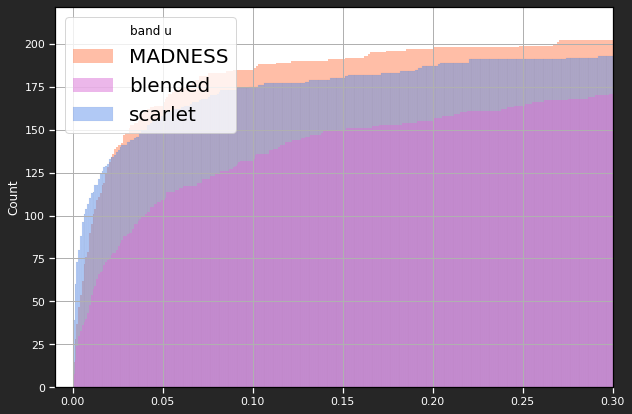

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


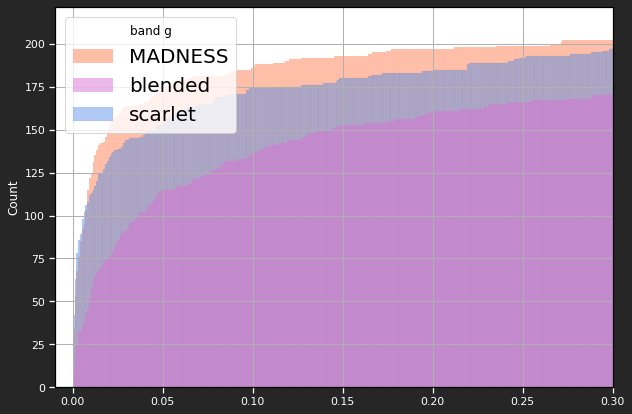

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


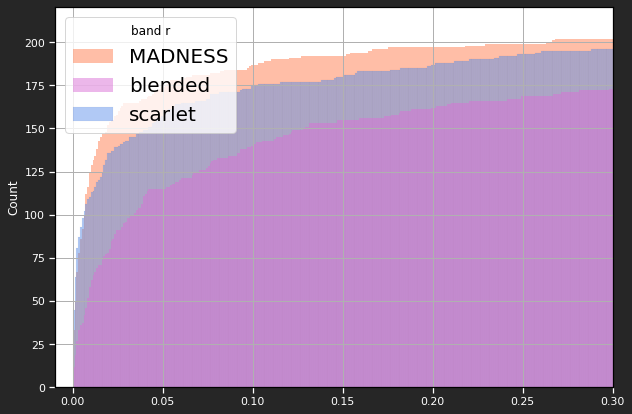

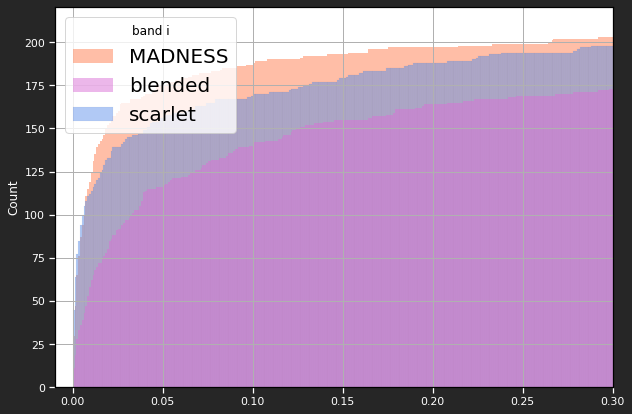

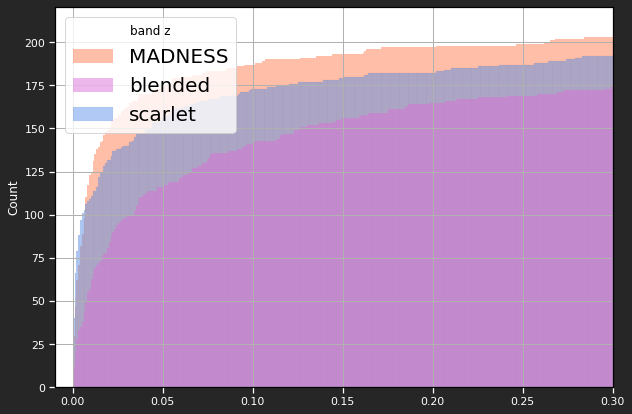

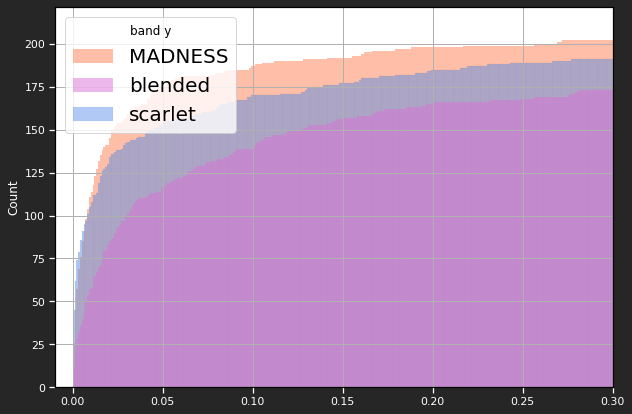

In [22]:
for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    plt.figure(figsize=(10, 7))
    bins = np.arange(-1, 1, 0.001)
    plt.hist(
        np.abs((madness_photometry[band+"_flux"].values - actual_photometry[band+"_flux"].values)) / actual_photometry[band+"_flux"].values,
        bins=bins,
        alpha=0.5,
        label="MADNESS",
        cumulative=True,
        color="coral"
    )

    sns.histplot(
        np.abs((scarlet_photometry[band+"_flux"].values - actual_photometry[band+"_flux"].values)) / actual_photometry[band+"_flux"].values,
        bins=bins,
        alpha=0.5,
        label="scarlet",
        cumulative=True,
        color="cornflowerblue"
    )

    plt.hist(
        (blended_photometry[band+"_flux"].values - actual_photometry[band+"_flux"].values) / actual_photometry[band+"_flux"].values,
        bins=bins,
        alpha=0.5,
        label="blended",
        cumulative=True,
        color="orchid",
    )
    plt.xlim([-.01, .3])

    plt.legend(fontsize=20, title="band " + band)
    plt.show()

# error variation plots

/tmp/ipykernel_6925/3601683040.py:1: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  h = plt.hist2d(madness_results['size'].values, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
/tmp/ipykernel_6925/3601683040.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(h[3])


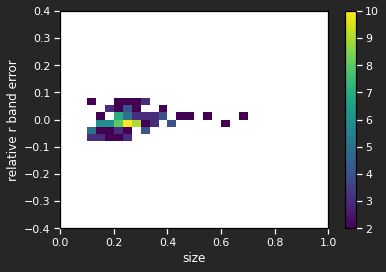

In [23]:
h = plt.hist2d(madness_results['size'].values, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
plt.xlabel("size")
plt.ylabel("relative r band error")
plt.colorbar(h[3])
#plt.ylim(-.1,.1)

# Plot SNR

In [24]:
madness_results

,u_covariance,u_actual_flux,u_predicted_flux,g_covariance,g_actual_flux,g_predicted_flux,r_covariance,r_actual_flux,r_predicted_flux,i_covariance,...,z_blendedness,y_blendedness,galaxy_num,size,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
0,0.998214,8023.937816,7158.431955,0.999417,6.357594e+04,5.967840e+04,0.999356,1.261875e+05,1.188931e+05,0.999237,...,0.421815,0.406362,0.0,0.120723,-0.107865,-0.061305,-0.057806,-0.051805,-0.055494,-0.037111
1,0.997987,6288.863216,5979.993514,0.998991,4.983287e+04,5.056288e+04,0.998739,9.891153e+04,1.003940e+05,0.998695,...,0.234071,0.312225,1.0,0.150372,-0.049114,0.014649,0.014988,0.020262,0.011590,0.029177
2,0.996171,9368.427343,8250.483126,0.998599,7.423491e+04,7.036349e+04,0.998537,1.473458e+05,1.395418e+05,0.998164,...,0.138291,0.164773,2.0,0.311408,-0.119331,-0.052151,-0.052964,-0.061629,-0.075948,-0.084910
3,0.904605,8482.909611,34196.520007,0.899620,6.721165e+04,2.820535e+05,0.893399,1.334050e+05,5.606983e+05,0.892116,...,0.864417,0.871340,3.0,0.342043,3.031225,3.196497,3.202978,3.148152,3.125903,2.992043
4,0.997451,6558.226897,6366.916028,0.998404,5.196237e+04,5.378231e+04,0.998201,1.031356e+05,1.066170e+05,0.997698,...,-0.105798,0.059396,4.0,0.186702,-0.029171,0.035024,0.033755,0.039882,0.024670,0.044637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.986772,6341.615177,8812.861244,0.986857,5.024599e+04,7.318368e+04,0.985659,9.973106e+04,1.454811e+05,0.985397,...,0.592895,0.585120,75.0,0.175178,0.389687,0.456508,0.458734,0.461673,0.445556,0.465413
208,0.995669,8548.723288,8427.243569,0.998003,6.773828e+04,7.186562e+04,0.997814,1.344503e+05,1.421437e+05,0.997562,...,0.255205,0.392614,76.0,0.378793,-0.014210,0.060931,0.057221,0.048824,0.041029,0.036555
209,0.972322,5670.853021,4878.189395,0.987218,4.493039e+04,4.402856e+04,0.986978,8.917819e+04,8.720736e+04,0.987060,...,0.496556,0.515560,77.0,0.424578,-0.139779,-0.020072,-0.022100,-0.047241,-0.078990,-0.142955
210,0.998322,160678.839317,132418.902341,0.998349,1.273085e+06,1.068089e+06,0.998225,2.526850e+06,2.126013e+06,0.998204,...,0.130991,0.111234,78.0,0.446257,-0.175878,-0.161023,-0.158631,-0.161667,-0.161807,-0.179290


In [25]:
madness_photometry

,ufield_num,u_flux,u_fluxerrs,u_flags,gfield_num,g_flux,g_fluxerrs,g_flags,rfield_num,r_flux,...,zfield_num,z_flux,z_fluxerrs,z_flags,yfield_num,y_flux,y_fluxerrs,y_flags,field_num,galaxy_num
0,NaN,4152.514587,221.284903,0.0,NaN,35843.361055,879.042578,0.0,NaN,71947.051090,...,NaN,32953.923327,2747.924280,0.0,NaN,14859.137850,2911.063262,0.0,0.0,0.0
1,NaN,3375.578978,220.660685,0.0,NaN,29073.948981,876.562904,0.0,NaN,58863.514723,...,NaN,29660.240302,2740.172715,0.0,NaN,17367.935143,2902.851501,0.0,0.0,1.0
2,NaN,3613.610092,221.129013,0.0,NaN,31176.636527,878.423315,0.0,NaN,64173.986133,...,NaN,28489.414070,2745.988440,0.0,NaN,11447.191909,2909.012495,0.0,0.0,2.0
3,NaN,10665.257498,221.129013,0.0,NaN,85998.076980,878.423315,0.0,NaN,174188.805918,...,NaN,76239.501401,2745.988440,0.0,NaN,42472.570184,2909.012495,0.0,0.0,3.0
4,NaN,3799.618299,220.347912,0.0,NaN,30597.749564,875.320433,0.0,NaN,65195.714214,...,NaN,27994.681190,2736.288698,0.0,NaN,14684.665024,2898.736897,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,5268.340869,215.882526,0.0,NaN,41178.059683,869.601729,0.0,NaN,86071.664236,...,NaN,43401.925539,2750.553835,0.0,NaN,19809.417802,2896.121739,0.0,2.0,75.0
208,NaN,3463.150646,215.730013,0.0,NaN,31144.776075,868.987386,0.0,NaN,64041.243452,...,NaN,27691.883345,2748.610667,0.0,NaN,13544.521230,2894.075732,0.0,2.0,76.0
209,NaN,2050.661003,215.424662,0.0,NaN,13915.958641,867.757397,0.0,NaN,27061.170748,...,NaN,13792.868572,2744.720204,0.0,NaN,3456.105511,2889.979374,0.0,2.0,77.0
210,NaN,47080.337454,216.034932,0.0,NaN,387552.917070,870.215638,0.0,NaN,802381.196953,...,NaN,370170.517832,2752.495631,0.0,NaN,170588.146250,2898.166301,0.0,2.0,78.0


In [26]:
actual_photometry

,ufield_num,u_flux,u_fluxerrs,u_flags,gfield_num,g_flux,g_fluxerrs,g_flags,rfield_num,r_flux,...,zfield_num,z_flux,z_fluxerrs,z_flags,yfield_num,y_flux,y_fluxerrs,y_flags,field_num,galaxy_num
0,NaN,4084.072201,221.284903,0.0,NaN,36261.033467,879.042578,0.0,NaN,72641.109355,...,NaN,33144.571790,2747.924280,0.0,NaN,14519.296778,2911.063262,0.0,0.0,0.0
1,NaN,3209.607639,220.660685,0.0,NaN,28374.858517,876.562904,0.0,NaN,57245.482589,...,NaN,28805.950176,2740.172715,0.0,NaN,16648.595682,2902.851501,0.0,0.0,1.0
2,NaN,3560.028264,221.129013,0.0,NaN,31223.418776,878.423315,0.0,NaN,64314.444507,...,NaN,28280.566431,2745.988440,0.0,NaN,11172.539874,2909.012495,0.0,0.0,2.0
3,NaN,3613.112279,221.129013,0.0,NaN,28718.703192,878.423315,0.0,NaN,57695.881661,...,NaN,22258.888224,2745.988440,0.0,NaN,17117.491209,2909.012495,0.0,0.0,3.0
4,NaN,3729.475985,220.347912,0.0,NaN,30368.828047,875.320433,0.0,NaN,64728.203057,...,NaN,27717.944995,2736.288698,0.0,NaN,14588.033511,2898.736897,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,3778.903575,215.882526,0.0,NaN,29163.115544,869.601729,0.0,NaN,61170.899355,...,NaN,31741.896749,2750.553835,0.0,NaN,14550.148557,2896.121739,0.0,2.0,75.0
208,NaN,3236.568159,215.730013,0.0,NaN,30253.902068,868.987386,0.0,NaN,62446.049951,...,NaN,26835.834049,2748.610667,0.0,NaN,13039.977043,2894.075732,0.0,2.0,76.0
209,NaN,1949.451177,215.424662,0.0,NaN,13629.419660,867.757397,0.0,NaN,26673.589987,...,NaN,13664.908911,2744.720204,0.0,NaN,3299.405630,2889.979374,0.0,2.0,77.0
210,NaN,56362.952500,216.034932,0.0,NaN,463895.713477,870.215638,0.0,NaN,960510.559961,...,NaN,442733.215586,2752.495631,0.0,NaN,204597.180898,2898.166301,0.0,2.0,78.0


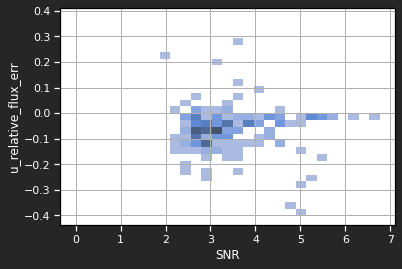

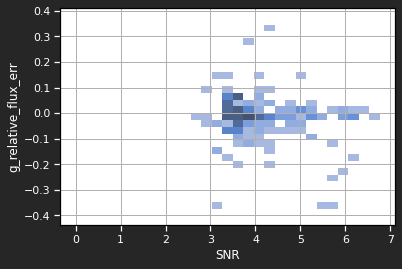

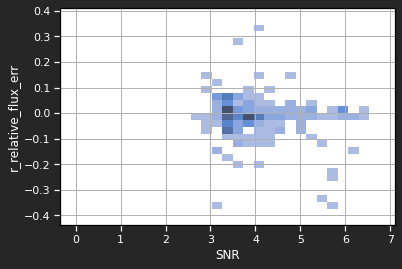

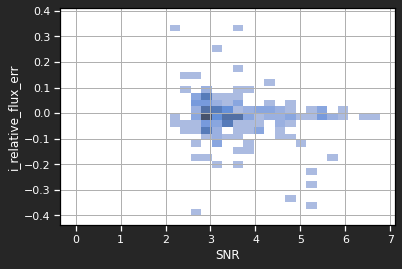

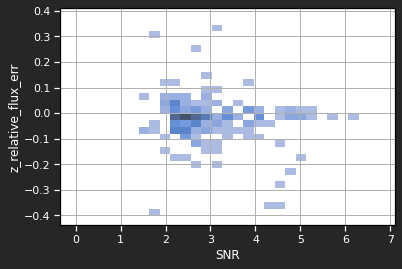

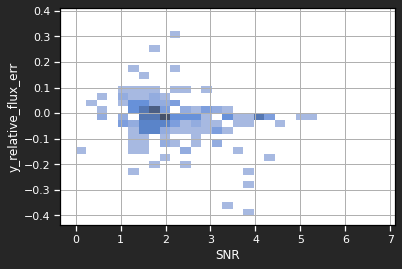

In [27]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,7,7/30)
    y_bins = np.arange(-.4, .4, .8/30)
    sns.histplot(x=snr, y=madness_results[band+ "_relative_flux_err"], bins=[x_bins, y_bins], kde=True)
    plt.xlabel("SNR")
    plt.show()

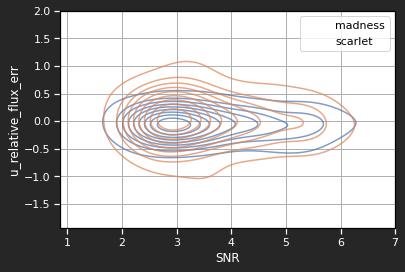

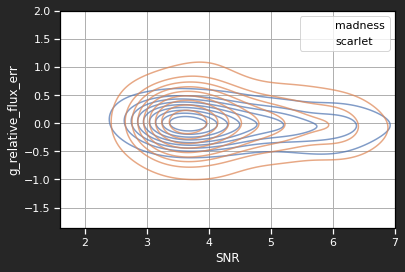

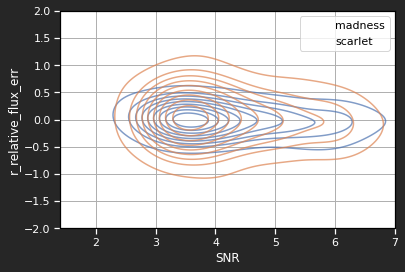

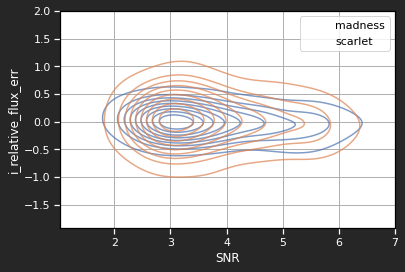

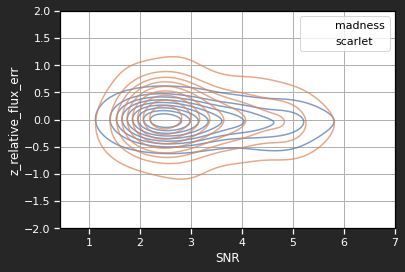

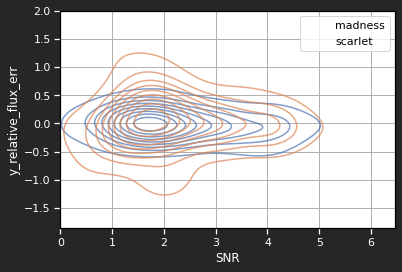

In [28]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [0, 7]
    y_bins = [-2, 2]
    sns.kdeplot(x=snr, y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=.7, label="madness")
    sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet")
    plt.legend()
    plt.xlabel("SNR")
    plt.show()

# Compare with blendedness

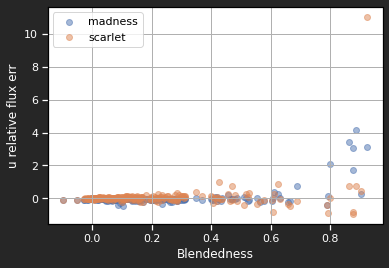

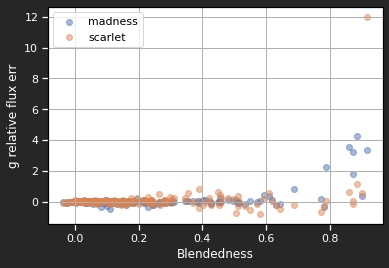

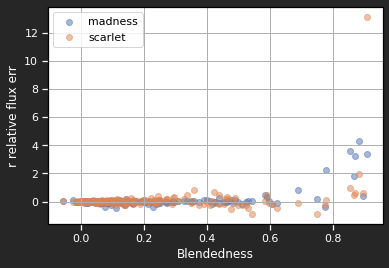

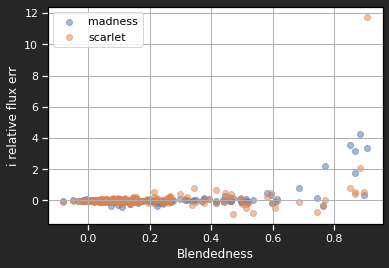

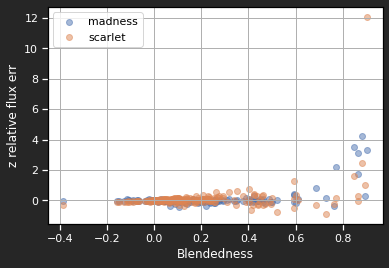

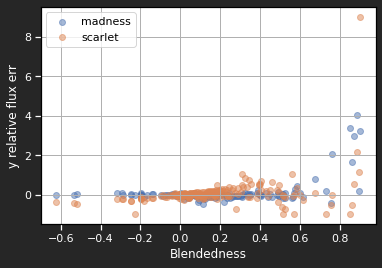

In [29]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [0, 7]
    y_bins = [-2, 2]
    plt.scatter(madness_results[band+"_blendedness"], madness_results[band+ "_relative_flux_err"], alpha=.5, label="madness")
    plt.scatter(scarlet_results[band+"_blendedness"], scarlet_results[band+ "_relative_flux_err"], alpha=.5, label="scarlet")
    plt.xlabel("Blendedness")
    plt.ylabel(band+" relative flux err")
    #sns.kdeplot(x=madness_results[band+"_blendedness"], y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=.7)
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7
    plt.legend()
    plt.show()